# DATA ANALYTICS ENGINNER CHALLENGE

### En este desafio nos desenvolveremos a travez de una problematica de clusterizacion de sellers, con el fin de generar alto valor al negocio, ya que la importancia de tener una buena clasificacion de los sellers permite al negocio realizar estrategia optimas y que generen lo esperado.

### En este paso estaremos aplicando un crips-dm con el fin de darle un  orden claro y consiso al projecto.


## Entendimiento del Negocio:
### En esta ocasion segmentaremos los sellers de MELI, teniendo en cuenta que MELI, es un e-commerce amplio que ha crecido exponencialmente a traves del tiempo, lo que ha captado mas sellers y transacciones por minuto, y globalizado en el mercado LatinoAmericano, y aun sigue en aumento. Como todo negocio es importante conocer las caracteristicas de nuestros clientes en este caso los seller, sus comportamiento, sus capacidades de transacciones, sus productos sus categorias, por tal razon es necesario tener una clasificacion optima de nuestros sellers para poder realizar actividades, acciones dirigidas a un tipo o algunos tipos de sellers especificos, para que se pueda cumplir con lo esperado y optimizarlos recurso siendo estas actividades enfocadas.



In [2]:
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

"""Libreias.

Importamos librerias para la exploracion de los datos
-pandas, para el tratamientos de los datos
-os, para el manejo sitrma operativo
-pathlib, para el manejo de rutas
"""

'Libreias.\n\nImportamos librerias para la exploracion de los datos\n-pandas, para el tratamientos de los datos\n-os, para el manejo sitrma operativo\n-pathlib, para el manejo de rutas\n'

# Entendimiento de los Datos:

### La fuente de datos es un csv, con 14 variables y 185250 registros, en el encontramos variables categoricas y numericas. encotramos los productos y sus caracteristicas como inventario y precios, esto de los sellers, lo cual tenemos el mismo seller con diferente producto, se tambien se tiene que tenemos varias catergorias y una reputacion de seller que es como una puntuacion. Ya teniendo esto se realizaran transformaciones a la Data para por encontrar una mejor en las varibles y tambien crear variables nuevas que permitan tener mas informacion que se pueda modelar.

In [3]:
# leemos e importamos a un DF el archivo fuents .csv

root = Path('.').resolve().parent
filename = "df_challenge_meli_base.csv"
pr = os.path.join(root,'src','data', 'raw',filename)
pr

'D:\\Clustering_MeLi\\src\\data\\raw\\df_challenge_meli_base.csv'

In [4]:
#Leemos el archivo en un DF

DF = pd.read_csv(pr,delimiter=',', encoding='Latin-1')
DF.head(5)

,tim_day,seller_nickname,titulo,seller_reputation,stock,logistic_type,condition,is_refurbished,price,regular_price,categoria,url,category_id,category_name
0,2024-08-01,5a39342818,Gel Cerave Limpiador Espumoso Piel Normal A Gr...,green_platinum,16155,FBM,new,False,260.93,355.00,BEAUTY PERSONAL CARE,https://articulo.mercadolibre.com.mx/MLM-17883...,BEAUTY PERSONAL CARE,CUIDADO PERSONAL Y BELLEZA
1,2024-08-01,5a39342818,Kit Garnier Express Aclara Serum +crema +gel C...,green_platinum,6253,FBM,new,False,344.26,NaN,BEAUTY PERSONAL CARE,https://articulo.mercadolibre.com.mx/MLM-31259...,BEAUTY PERSONAL CARE,CUIDADO PERSONAL Y BELLEZA
2,2024-08-01,66d9659692,3 Piezas De Minoxidil 5% Anacastel,green_platinum,10066,FBM,new,False,363.00,660.00,HAIR,https://articulo.mercadolibre.com.mx/MLM-19360...,HAIR,CUIDADO DEL CABELLO
3,2024-08-01,5a39342818,Limpiador Cerave Control Imperfecciones Para P...,green_platinum,19678,FBM,new,False,241.00,410.00,BEAUTY PERSONAL CARE,https://articulo.mercadolibre.com.mx/MLM-18485...,BEAUTY PERSONAL CARE,CUIDADO PERSONAL Y BELLEZA
4,2024-08-01,5a39342818,Labial Líquido Maybelline Super Stay Matte Ink...,green_platinum,4862,FBM,new,False,133.47,152.49,FRAGRANCES & MAKE UP,https://articulo.mercadolibre.com.mx/MLM-15825...,FRAGRANCES & MAKE UP,FRAGANCIAS Y MAQUILLAJE


In [5]:
print(DF.shape)
DF['tim_day'].value_counts()

(185250, 14)


tim_day
2024-08-01    185250
Name: count, dtype: int64

In [6]:
#Exploramos los tipos de datos, para saber las variable con datos nulos
print(DF.columns)
print(DF.info())

Index(['tim_day', 'seller_nickname', 'titulo', 'seller_reputation', 'stock',
       'logistic_type', 'condition', 'is_refurbished', 'price',
       'regular_price', 'categoria', 'url', 'category_id', 'category_name'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185250 entries, 0 to 185249
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   tim_day            185250 non-null  object 
 1   seller_nickname    185250 non-null  object 
 2   titulo             185250 non-null  object 
 3   seller_reputation  182878 non-null  object 
 4   stock              185250 non-null  int64  
 5   logistic_type      185250 non-null  object 
 6   condition          185250 non-null  object 
 7   is_refurbished     185250 non-null  bool   
 8   price              183734 non-null  float64
 9   regular_price      49956 non-null   float64
 10  categoria          185250 non-null  object 
 11  url    

In [7]:
[DF.iloc[0,x] for x in range(0,13)]


['2024-08-01',
 '5a39342818',
 'Gel Cerave Limpiador Espumoso Piel Normal A Grasa Sin Perfume De 473 Ml',
 'green_platinum',
 np.int64(16155),
 'FBM',
 'new',
 np.False_,
 np.float64(260.93),
 np.float64(355.0),
 'BEAUTY PERSONAL CARE',
 'https://articulo.mercadolibre.com.mx/MLM-1788372545-gel-cerave-limpiador-espumoso-piel-normal-a-grasa-sin-perfume-de-473-ml-_JM',
 'BEAUTY PERSONAL CARE']

In [8]:
DF["seller_reputation"].value_counts()

seller_reputation
green_platinum    69625
green             33838
green_gold        28332
green_silver      24731
newbie             9221
yellow             7245
red                4219
light_green        3101
orange             2566
Name: count, dtype: int64

In [9]:
DF["logistic_type"].value_counts()

logistic_type
XD      116763
FBM      31483
DS       24645
Otro     10541
FLEX      1818
Name: count, dtype: int64

In [10]:
DF["categoria"].value_counts()

categoria
SPORTS                                 14252
HEALTH                                 12587
BOOKS, MULTIMEDIA & OTHER E!           10355
TOYS AND GAMES                         10251
ACC CARS & VANS                        10128
OTHER                                   7797
HOUSEHOLD APPLIANCES                    7090
ANTIQUES & HOBBIES                      6453
HOUSEHOLD ITEMS                         5569
APPAREL ACCESSORIES                     5423
AUDIO & GENERAL ELECTRONICS             5373
APPAREL                                 5356
FRAGRANCES & MAKE UP                    5203
SMARTPHONES & TABLETS                   5197
PET                                     4926
TOOLS                                   4535
IT PERIPHERALS, PARTS & ACCESSORIES     4150
BEAUTY PERSONAL CARE                    4129
FOODS                                   3923
MUSICAL INSTRUMENTS                     3895
FOOTWEAR                                3473
PARTY                                   2881


In [11]:
DF["categoria"].unique().size

54

In [12]:
DF["category_id"].value_counts()

category_id
SPORTS                                 14252
HEALTH                                 12587
BOOKS, MULTIMEDIA & OTHER E!           10355
TOYS AND GAMES                         10251
ACC CARS & VANS                        10128
OTHER                                   7797
HOUSEHOLD APPLIANCES                    7090
ANTIQUES & HOBBIES                      6453
HOUSEHOLD ITEMS                         5569
APPAREL ACCESSORIES                     5423
AUDIO & GENERAL ELECTRONICS             5373
APPAREL                                 5356
FRAGRANCES & MAKE UP                    5203
SMARTPHONES & TABLETS                   5197
PET                                     4926
TOOLS                                   4535
IT PERIPHERALS, PARTS & ACCESSORIES     4150
BEAUTY PERSONAL CARE                    4129
FOODS                                   3923
MUSICAL INSTRUMENTS                     3895
FOOTWEAR                                3473
PARTY                                   288

In [13]:
DF["category_id"].unique().size

54

In [14]:
DF["category_name"].value_counts()

category_name
DEPORTES                                   14252
SALUD                                      12587
LIBROS, MULTIMEDIA Y OTROS                 10355
JUGUETES Y JUEGOS                          10251
ACCESORIOS PARA AUTOS Y CAMIONETAS         10128
OTROS                                       7797
ELECTRODOMÉSTICOS                           7090
ANTIGÜEDADES Y PASATIEMPOS                  6453
ARTÍCULOS DEL HOGAR                         5569
ACCESORIOS DE VESTIR                        5423
AUDIO Y ELECTRÓNICA GENERAL                 5373
ROPA                                        5356
FRAGANCIAS Y MAQUILLAJE                     5203
TELÉFONOS INTELIGENTES Y TABLETAS           5197
MASCOTAS                                    4926
HERRAMIENTAS                                4535
PERIFÉRICOS Y ACCESORIOS DE INFORMÁTICA     4150
CUIDADO PERSONAL Y BELLEZA                  4129
ALIMENTOS                                   3923
INSTRUMENTOS MUSICALES                      3895
CALZAD

In [15]:
DF["category_name"].unique().size

54

In [16]:
DF["condition"].value_counts()

condition
new              169616
used              15551
not_specified        83
Name: count, dtype: int64

In [17]:
DF["is_refurbished"].value_counts()

is_refurbished
False    184515
True        735
Name: count, dtype: int64

# 3. PREPARACION DE LOS DATOS

### Ya teniendo un entendimiento de los datos, se realizaran operacion que permita extraer de las variables categorias la mayor informacion posible que pueda ser consumida en el modelado, haciendo un one-hotencoder para transformar estas variables en numericas, crearemos una nueva variable que sera como el ingreso potencial de cliente por producto que sera el resultado del inventario de un producto por su precio. Se realizar la imputacion de datos nulls que se han identificado con el fin de que no se convierta en ruido al realizar el modelos.

### Se Normalizaran o escalaran, las variables y se realizara DEA.

In [18]:
# por las caracteristicas de las variables dadas tomaremos las siguientes variables como importantes
# 'seller_nickname','seller_reputation', 'stock','logistic_type', 'condition', 'is_refurbished', 'price', 'regular_price'

#nuevo DF
columns = ['seller_nickname','seller_reputation', 'stock','logistic_type', 'condition', 'is_refurbished', 'price', 'regular_price']
dfv2 = DF[columns]
dfv2.head(5)

,seller_nickname,seller_reputation,stock,logistic_type,condition,is_refurbished,price,regular_price
0,5a39342818,green_platinum,16155,FBM,new,False,260.93,355.00
1,5a39342818,green_platinum,6253,FBM,new,False,344.26,NaN
2,66d9659692,green_platinum,10066,FBM,new,False,363.00,660.00
3,5a39342818,green_platinum,19678,FBM,new,False,241.00,410.00
4,5a39342818,green_platinum,4862,FBM,new,False,133.47,152.49


In [19]:
#desde el inicio sabemos que los precios dados tienen valores nulos, verifico si los nulls de la variable price tienen un valor no nulo en la variable regular_price
#para eso creamos otro DF solo con las variables null de price que es la variable tipo price que tiene mas valores no nulls
df_null=dfv2[dfv2["price"].isnull()]
df_null

,seller_nickname,seller_reputation,stock,logistic_type,condition,is_refurbished,price,regular_price
12370,ff130f47bc,newbie,5,DS,new,False,NaN,NaN
12378,a65d7813d5,newbie,10,DS,new,False,NaN,NaN
12390,cbef895c34,newbie,100,DS,new,False,NaN,NaN
12402,253d98d8fd,newbie,200,DS,new,False,NaN,NaN
12421,cd669ca4e6,newbie,50,DS,new,False,NaN,NaN
...,...,...,...,...,...,...,...,...
180371,7bb2482c22,green_gold,1,XD,used,False,NaN,NaN
182262,aab6cec86c,green_silver,10,XD,new,False,NaN,NaN
183382,967947183a,green_gold,200,DS,new,False,NaN,NaN
185095,f41f176eef,newbie,3,DS,new,False,NaN,NaN


In [20]:
#del df_null se revisa cual de los price tiene un valor nonull in regular_price
df_null2 = df_null[df_null['regular_price'].isnull()]
df_null2

,seller_nickname,seller_reputation,stock,logistic_type,condition,is_refurbished,price,regular_price
12370,ff130f47bc,newbie,5,DS,new,False,NaN,NaN
12378,a65d7813d5,newbie,10,DS,new,False,NaN,NaN
12390,cbef895c34,newbie,100,DS,new,False,NaN,NaN
12402,253d98d8fd,newbie,200,DS,new,False,NaN,NaN
12421,cd669ca4e6,newbie,50,DS,new,False,NaN,NaN
...,...,...,...,...,...,...,...,...
180371,7bb2482c22,green_gold,1,XD,used,False,NaN,NaN
182262,aab6cec86c,green_silver,10,XD,new,False,NaN,NaN
183382,967947183a,green_gold,200,DS,new,False,NaN,NaN
185095,f41f176eef,newbie,3,DS,new,False,NaN,NaN


In [21]:
#se pudo observar que los precios nonull en ambas variables tienen la misma cantidad de no nulls, sabiendo esto, creo un df con los indices y los comparare si son iguales
#con el de verificar que sean lo mismo registros

df_comp = pd.DataFrame(df_null.index.values,df_null2.index.values).reset_index()
col=  df_comp.columns
df_comp.rename(columns={'index':'p_null',0:'rp_null'},inplace=True)
print(df_comp.info())
df_comp[df_comp['p_null'] != df_comp['rp_null']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516 entries, 0 to 1515
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   p_null   1516 non-null   int64
 1   rp_null  1516 non-null   int64
dtypes: int64(2)
memory usage: 23.8 KB
None


,p_null,rp_null


In [22]:
df_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516 entries, 0 to 1515
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   p_null   1516 non-null   int64
 1   rp_null  1516 non-null   int64
dtypes: int64(2)
memory usage: 23.8 KB


In [23]:
#teniendo ya esta validacion, eliminaremos estos datos para que no interfieran en el modelado, ya que solo representa aprox el 1% de todos los datos
dfv3 = dfv2[dfv2['price']>0].reset_index()
dfv3.drop('regular_price',axis=1,inplace=True)
dfv3

,index,seller_nickname,seller_reputation,stock,logistic_type,condition,is_refurbished,price
0,0,5a39342818,green_platinum,16155,FBM,new,False,260.93
1,1,5a39342818,green_platinum,6253,FBM,new,False,344.26
2,2,66d9659692,green_platinum,10066,FBM,new,False,363.00
3,3,5a39342818,green_platinum,19678,FBM,new,False,241.00
4,4,5a39342818,green_platinum,4862,FBM,new,False,133.47
...,...,...,...,...,...,...,...,...
183727,185245,857d559845,green_gold,2,XD,new,False,9590.00
183728,185246,3b3dd23120,green_platinum,173,XD,new,False,2353.00
183729,185247,c6db332281,green_gold,1,XD,new,False,2895.00
183730,185248,af958de9cc,yellow,0,XD,new,False,540.00


In [24]:
#Creamos una nueva columna con el potencial de venta de los productos de cada cliente, t_amount = price *stock y contamos los productos de cada cliente en un nuevo df
dfv3['t_amount'] = dfv3['stock'] * dfv3['price']
dfv3.head(5)

,index,seller_nickname,seller_reputation,stock,logistic_type,condition,is_refurbished,price,t_amount
0,0,5a39342818,green_platinum,16155,FBM,new,False,260.93,4215324.15
1,1,5a39342818,green_platinum,6253,FBM,new,False,344.26,2152657.78
2,2,66d9659692,green_platinum,10066,FBM,new,False,363.00,3653958.00
3,3,5a39342818,green_platinum,19678,FBM,new,False,241.00,4742398.00
4,4,5a39342818,green_platinum,4862,FBM,new,False,133.47,648931.14


In [25]:
# como existen sellers sin reputacion los extraemos ya que no aporta al comportamiento en el modelado.
dfsrnull =dfv3[dfv3['seller_reputation'].isnull()]
print(dfsrnull.shape)
dfsrnull.head(10)

(2363, 9)


,index,seller_nickname,seller_reputation,stock,logistic_type,condition,is_refurbished,price,t_amount
1696,1696,522ef2803c,NaN,8,XD,new,False,4469.0,35752.0
2545,2545,311a3cf7bb,NaN,8,XD,new,False,1650.0,13200.0
3351,3351,4b72af8413,NaN,1,XD,new,False,220.0,220.0
3879,3879,64f1bb49e6,NaN,8,XD,new,False,1349.0,10792.0
3911,3911,13b1b97c30,NaN,1,XD,used,False,2300.0,2300.0
5019,5019,0530713b03,NaN,1,DS,new,False,160.0,160.0
5623,5623,70efa7e929,NaN,20,DS,new,False,425.0,8500.0
5709,5709,f42149369a,NaN,1,XD,new,False,250.0,250.0
5944,5944,eaa1aae963,NaN,1,DS,new,False,1799.0,1799.0
6044,6044,6f4136c3a8,NaN,1,DS,new,False,754.0,754.0


In [26]:
dfv3=dfv3[dfv3['seller_reputation'].isnull()==False]
dfv3[dfv3['seller_reputation'].isnull()]

,index,seller_nickname,seller_reputation,stock,logistic_type,condition,is_refurbished,price,t_amount


In [27]:
df_sr = dfv3[['seller_nickname', 'seller_reputation']]
print(df_sr.shape)
df_sr.drop_duplicates(inplace=True)
print(df_sr)
df_sr.head(5)

(181369, 2)
       seller_nickname seller_reputation
0           5a39342818    green_platinum
2           66d9659692    green_platinum
10          3059e1c98b    green_platinum
13          92a7303a20    green_platinum
25          df393d2121    green_platinum
...                ...               ...
183708      8530fb1965            newbie
183714      c5adf7ca76               red
183720      51110d0ad0            newbie
183726      e18938e938      green_silver
183730      af958de9cc            yellow

[44081 rows x 2 columns]


C:\Users\Usuario\AppData\Local\Temp\ipykernel_39168\2510792098.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sr.drop_duplicates(inplace=True)


,seller_nickname,seller_reputation
0,5a39342818,green_platinum
2,66d9659692,green_platinum
10,3059e1c98b,green_platinum
13,92a7303a20,green_platinum
25,df393d2121,green_platinum


In [28]:
df_sr['seller_reputation'].value_counts()

seller_reputation
green             12964
newbie             6462
green_silver       6391
green_platinum     5776
green_gold         5353
yellow             2602
red                2086
light_green        1277
orange             1170
Name: count, dtype: int64

In [29]:
dfv3.describe().T

,count,mean,std,min,25%,50%,75%,max
index,181369.0,9.224763e+04,5.364333e+04,0.0,45850.0,91604.0,139288.0,1.852490e+05
stock,181369.0,3.122603e+02,3.394329e+03,0.0,2.0,8.0,44.0,9.999900e+04
price,181369.0,3.281464e+03,1.917927e+05,2.0,269.0,559.0,1349.0,7.194236e+07
t_amount,181369.0,4.335055e+06,1.697775e+09,0.0,1273.6,5398.5,28980.0,7.230207e+11


In [30]:
dfv3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181369 entries, 0 to 183731
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   index              181369 non-null  int64  
 1   seller_nickname    181369 non-null  object 
 2   seller_reputation  181369 non-null  object 
 3   stock              181369 non-null  int64  
 4   logistic_type      181369 non-null  object 
 5   condition          181369 non-null  object 
 6   is_refurbished     181369 non-null  bool   
 7   price              181369 non-null  float64
 8   t_amount           181369 non-null  float64
dtypes: bool(1), float64(2), int64(2), object(4)
memory usage: 12.6+ MB


In [31]:

#Transformaciones
#hot_encoder para las columnas, 'logistic_type', 'condition', 'is_refurbished', que son categoricas
col_dummies = ['logistic_type', 'condition', 'is_refurbished']
pfx = ['lt','cond','ref']
df_d1 = pd.get_dummies(dfv3[col_dummies], prefix=pfx, columns=col_dummies, dtype='int')
df_d1


,lt_DS,lt_FBM,lt_FLEX,lt_Otro,lt_XD,cond_new,cond_not_specified,cond_used,ref_False,ref_True
0,0,1,0,0,0,1,0,0,1,0
1,0,1,0,0,0,1,0,0,1,0
2,0,1,0,0,0,1,0,0,1,0
3,0,1,0,0,0,1,0,0,1,0
4,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
183727,0,0,0,0,1,1,0,0,1,0
183728,0,0,0,0,1,1,0,0,1,0
183729,0,0,0,0,1,1,0,0,1,0
183730,0,0,0,0,1,1,0,0,1,0


In [32]:
dfv4 = pd.concat([dfv3,df_d1], axis=1, join='inner')


In [33]:
dfv4

,index,seller_nickname,seller_reputation,stock,logistic_type,condition,is_refurbished,price,t_amount,lt_DS,lt_FBM,lt_FLEX,lt_Otro,lt_XD,cond_new,cond_not_specified,cond_used,ref_False,ref_True
0,0,5a39342818,green_platinum,16155,FBM,new,False,260.93,4215324.15,0,1,0,0,0,1,0,0,1,0
1,1,5a39342818,green_platinum,6253,FBM,new,False,344.26,2152657.78,0,1,0,0,0,1,0,0,1,0
2,2,66d9659692,green_platinum,10066,FBM,new,False,363.00,3653958.00,0,1,0,0,0,1,0,0,1,0
3,3,5a39342818,green_platinum,19678,FBM,new,False,241.00,4742398.00,0,1,0,0,0,1,0,0,1,0
4,4,5a39342818,green_platinum,4862,FBM,new,False,133.47,648931.14,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183727,185245,857d559845,green_gold,2,XD,new,False,9590.00,19180.00,0,0,0,0,1,1,0,0,1,0
183728,185246,3b3dd23120,green_platinum,173,XD,new,False,2353.00,407069.00,0,0,0,0,1,1,0,0,1,0
183729,185247,c6db332281,green_gold,1,XD,new,False,2895.00,2895.00,0,0,0,0,1,1,0,0,1,0
183730,185248,af958de9cc,yellow,0,XD,new,False,540.00,0.00,0,0,0,0,1,1,0,0,1,0


In [34]:
dfv4.drop(['seller_reputation', 'logistic_type', 'condition', 'is_refurbished'],axis=1,inplace=True)
dfv4['count']=1
print(dfv4.shape)
dfv4


(181369, 16)


,index,seller_nickname,stock,price,t_amount,lt_DS,lt_FBM,lt_FLEX,lt_Otro,lt_XD,cond_new,cond_not_specified,cond_used,ref_False,ref_True,count
0,0,5a39342818,16155,260.93,4215324.15,0,1,0,0,0,1,0,0,1,0,1
1,1,5a39342818,6253,344.26,2152657.78,0,1,0,0,0,1,0,0,1,0,1
2,2,66d9659692,10066,363.00,3653958.00,0,1,0,0,0,1,0,0,1,0,1
3,3,5a39342818,19678,241.00,4742398.00,0,1,0,0,0,1,0,0,1,0,1
4,4,5a39342818,4862,133.47,648931.14,0,1,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183727,185245,857d559845,2,9590.00,19180.00,0,0,0,0,1,1,0,0,1,0,1
183728,185246,3b3dd23120,173,2353.00,407069.00,0,0,0,0,1,1,0,0,1,0,1
183729,185247,c6db332281,1,2895.00,2895.00,0,0,0,0,1,1,0,0,1,0,1
183730,185248,af958de9cc,0,540.00,0.00,0,0,0,0,1,1,0,0,1,0,1


In [35]:
dfv5 = dfv4.groupby('seller_nickname').sum()
print(dfv5.columns)
dfv5


Index(['index', 'stock', 'price', 't_amount', 'lt_DS', 'lt_FBM', 'lt_FLEX',
       'lt_Otro', 'lt_XD', 'cond_new', 'cond_not_specified', 'cond_used',
       'ref_False', 'ref_True', 'count'],
      dtype='object')


,index,stock,price,t_amount,lt_DS,lt_FBM,lt_FLEX,lt_Otro,lt_XD,cond_new,cond_not_specified,cond_used,ref_False,ref_True,count
seller_nickname,,,,,,,,,,,,,,,
000631669c,117632,10,799.00,7990.00,0,0,0,1,0,1,0,0,1,0,1
0007153bca,243165,55,798.00,21945.00,0,0,0,0,2,2,0,0,2,0,2
000bee3c3b,108743,0,765.00,0.00,0,0,0,0,2,2,0,0,2,0,2
000df2bd02,174588,5,1550.00,7750.00,0,0,0,0,1,0,0,1,1,0,1
000e27cea2,173891,6,915.00,3070.00,0,1,0,0,1,2,0,0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffac55ae4,170154,6,549.00,3294.00,0,0,0,0,1,1,0,0,1,0,1
fffbc92083,96695,346,5592.45,221655.00,0,2,0,0,3,5,0,0,5,0,5
fffd101739,19814,1,19999.00,19999.00,0,0,0,1,0,1,0,0,1,0,1


Text(0.5, 1.0, 'price')

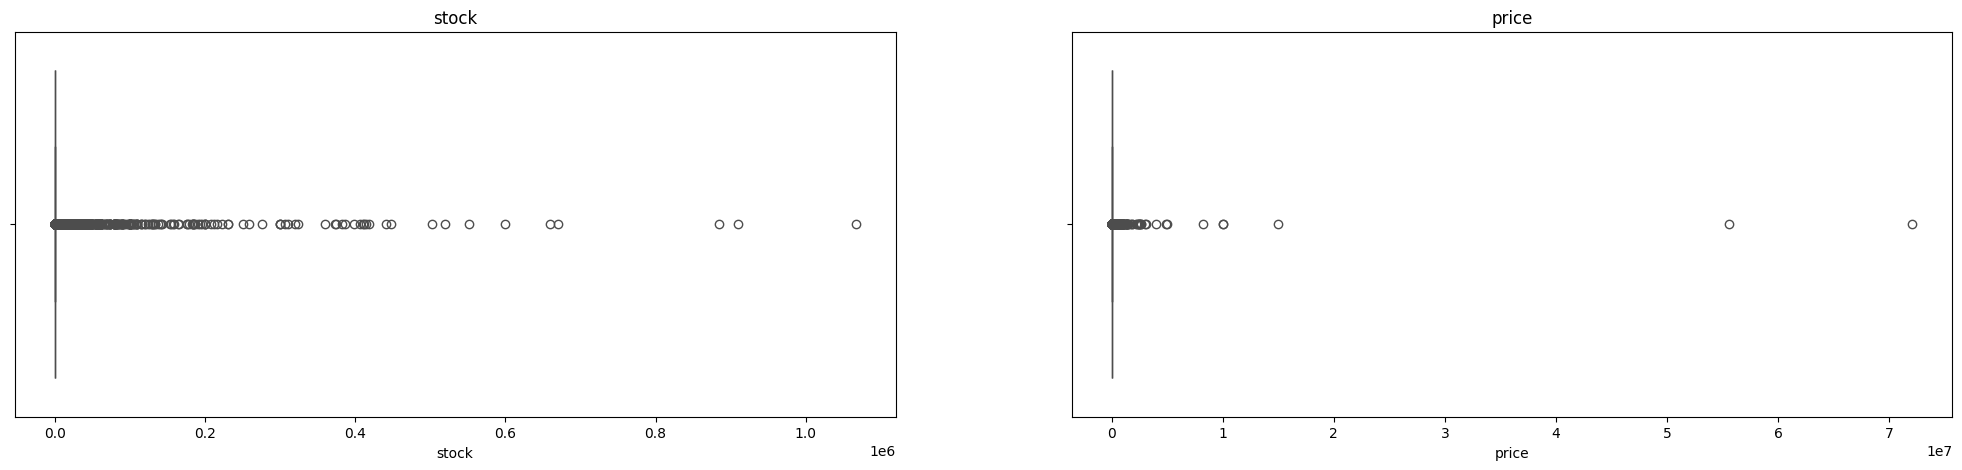

In [36]:
# Gráfico de cajas de Variables numericas con cajas 'stock', 'price',
fig, ax =plt.subplots(ncols=2,figsize=(25,5),sharex=False)
sns.boxplot(ax=ax[0], data = dfv5['stock'],orient='h',color='red')
ax[0].set_title('stock')
sns.boxplot(ax=ax[1], data = dfv5['price'],orient='h',color='grey')
ax[1].set_title('price')

In [37]:
#Eliminamos Outliers de las variables Stock Price
dfv5 = dfv5[(dfv5['price']<0.1e6)]
dfv5 = dfv5[(dfv5['stock']<0.1e4)]

(39849, 15)


Text(0.5, 1.0, 'price')

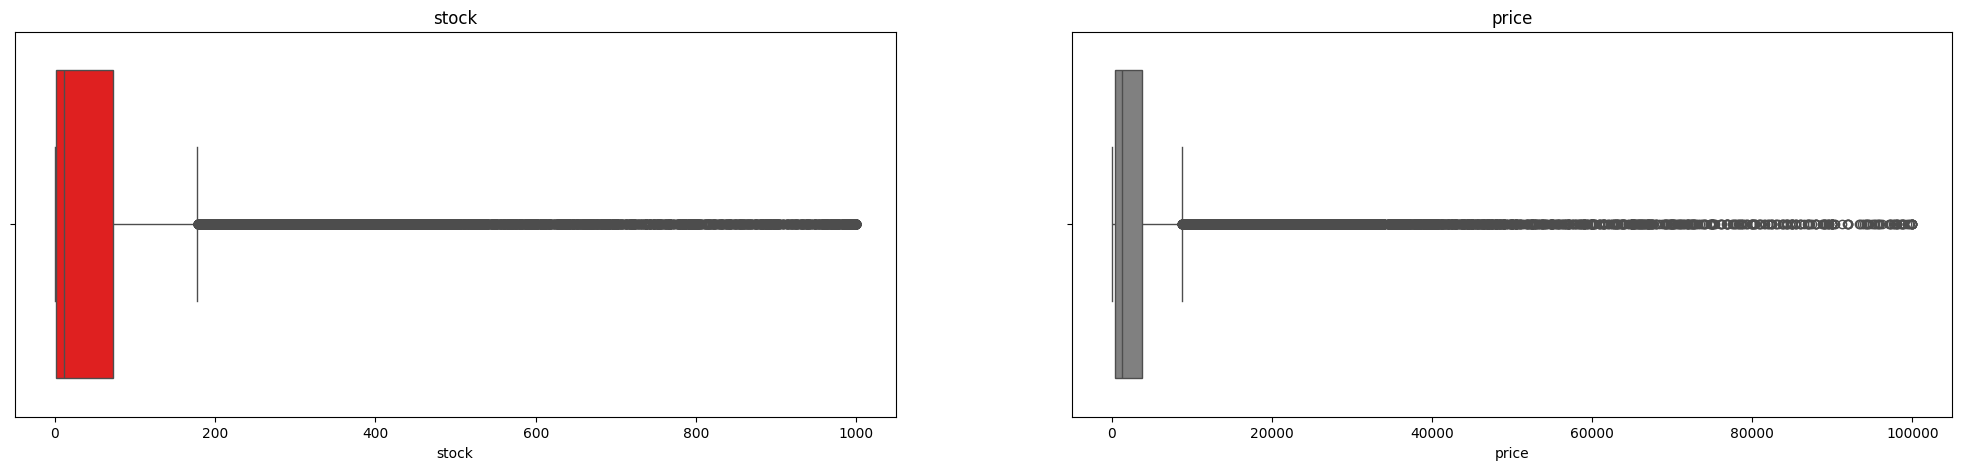

In [38]:
# Gráfico de cajas de Variables numericas con cajas 'stock', 'price',
print(dfv5.shape)
fig, ax =plt.subplots(ncols=2,figsize=(25,5),sharex=False)
sns.boxplot(ax=ax[0], data = dfv5['stock'],orient='h',color='red')
ax[0].set_title('stock')
sns.boxplot(ax=ax[1], data = dfv5['price'],orient='h',color='grey')
ax[1].set_title('price')

In [39]:
#una vez realizado las tranformaciones anteriores juntaremos nuevamente las con la reputacion
#1. para agregarla a la data para el modelado no supervisado con esta etiqueta para que sume mas variables
#2. son las etiquestas para el modelados supervisado.

dfv5_2=pd.merge(dfv5,df_sr,how='left', right_on='seller_nickname', left_on='seller_nickname')
dfv5_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39849 entries, 0 to 39848
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   seller_nickname     39849 non-null  object 
 1   index               39849 non-null  int64  
 2   stock               39849 non-null  int64  
 3   price               39849 non-null  float64
 4   t_amount            39849 non-null  float64
 5   lt_DS               39849 non-null  int64  
 6   lt_FBM              39849 non-null  int64  
 7   lt_FLEX             39849 non-null  int64  
 8   lt_Otro             39849 non-null  int64  
 9   lt_XD               39849 non-null  int64  
 10  cond_new            39849 non-null  int64  
 11  cond_not_specified  39849 non-null  int64  
 12  cond_used           39849 non-null  int64  
 13  ref_False           39849 non-null  int64  
 14  ref_True            39849 non-null  int64  
 15  count               39849 non-null  int64  
 16  sell

In [40]:
dfv5_2[dfv5_2['seller_reputation'].isnull() == True]

,seller_nickname,index,stock,price,t_amount,lt_DS,lt_FBM,lt_FLEX,lt_Otro,lt_XD,cond_new,cond_not_specified,cond_used,ref_False,ref_True,count,seller_reputation


In [41]:
df_sr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44081 entries, 0 to 183730
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   seller_nickname    44081 non-null  object
 1   seller_reputation  44081 non-null  object
dtypes: object(2)
memory usage: 1.0+ MB


In [42]:
#Ordinal encoder para la reputacion para usar como etiqueta para el supervisado
code_rep=df_sr['seller_reputation'].unique()
code_rep
z=[]
for i in code_rep:
    z.append(i)
print(z)
df_codere = pd.DataFrame(z).reset_index()
df_codere.rename(columns={'index':'label',0:'reputation'},inplace=True)
df_codere   


['green_platinum', 'green_gold', 'green', 'green_silver', 'yellow', 'light_green', 'red', 'orange', 'newbie']


,label,reputation
0,0,green_platinum
1,1,green_gold
2,2,green
3,3,green_silver
4,4,yellow
5,5,light_green
6,6,red
7,7,orange
8,8,newbie


In [43]:
#crearemos las fuentes para el modelado supervisado y no supervisado
#Modelado Supervisado, modificamos la etiqueta

df_sp=pd.merge(left=dfv5_2,right=df_codere,left_on='seller_reputation',right_on='reputation',how='left')

In [44]:
df_sp

,seller_nickname,index,stock,price,t_amount,lt_DS,lt_FBM,lt_FLEX,lt_Otro,lt_XD,cond_new,cond_not_specified,cond_used,ref_False,ref_True,count,seller_reputation,label,reputation
0,000631669c,117632,10,799.00,7990.0,0,0,0,1,0,1,0,0,1,0,1,newbie,8,newbie
1,0007153bca,243165,55,798.00,21945.0,0,0,0,0,2,2,0,0,2,0,2,green,2,green
2,000bee3c3b,108743,0,765.00,0.0,0,0,0,0,2,2,0,0,2,0,2,newbie,8,newbie
3,000df2bd02,174588,5,1550.00,7750.0,0,0,0,0,1,0,0,1,1,0,1,green,2,green
4,000e27cea2,173891,6,915.00,3070.0,0,1,0,0,1,2,0,0,2,0,2,green_silver,3,green_silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39844,fff9f4c6a0,29283,1,20000.00,20000.0,0,0,0,1,0,1,0,0,1,0,1,newbie,8,newbie
39845,fffac55ae4,170154,6,549.00,3294.0,0,0,0,0,1,1,0,0,1,0,1,red,6,red
39846,fffbc92083,96695,346,5592.45,221655.0,0,2,0,0,3,5,0,0,5,0,5,green_platinum,0,green_platinum
39847,fffd101739,19814,1,19999.00,19999.0,0,0,0,1,0,1,0,0,1,0,1,green,2,green


In [ ]:
cols=['stock', 'price', 't_amount', 'lt_DS',
       'lt_FBM', 'lt_FLEX', 'lt_Otro', 'lt_XD', 'cond_new',
       'cond_not_specified', 'cond_used', 'ref_False', 'ref_True', 'count']
df_nsp = df_sp[cols]


['stock',
 'price',
 't_amount',
 'lt_DS',
 'lt_FBM',
 'lt_FLEX',
 'lt_Otro',
 'lt_XD',
 'cond_new',
 'cond_not_specified',
 'cond_used',
 'ref_False',
 'ref_True',
 'count']

In [51]:

df_nsp.describe().T

,count,mean,std,min,25%,50%,75%,max
stock,39849.0,82.419007,170.481778,0.0,2.0,11.0,72.0,999.0
price,39849.0,4533.556515,9973.044938,9.5,477.0,1249.0,3798.0,99999.0
t_amount,39849.0,70204.955474,468774.709916,0.0,2112.0,8894.0,40220.0,54944001.0
lt_DS,39849.0,0.257121,1.224064,0.0,0.0,0.0,0.0,55.0
lt_FBM,39849.0,0.533012,1.870069,0.0,0.0,0.0,0.0,70.0
lt_FLEX,39849.0,0.000075,0.011201,0.0,0.0,0.0,0.0,2.0
lt_Otro,39849.0,0.140656,1.075248,0.0,0.0,0.0,0.0,66.0
lt_XD,39849.0,2.003363,4.158751,0.0,0.0,1.0,2.0,131.0
cond_new,39849.0,2.590278,4.852506,0.0,1.0,1.0,3.0,150.0
cond_not_specified,39849.0,0.001681,0.096215,0.0,0.0,0.0,0.0,15.0


# Analisis Explorartorios de los Datos

#### Una vez con la tranformacion de los datos y con la creacion de las nuevas variables podremos explorar las relaciones que existen entre las variables. esto lo realizaremos con un analisis de distribucion, correlacion y dispercion.

In [52]:
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns


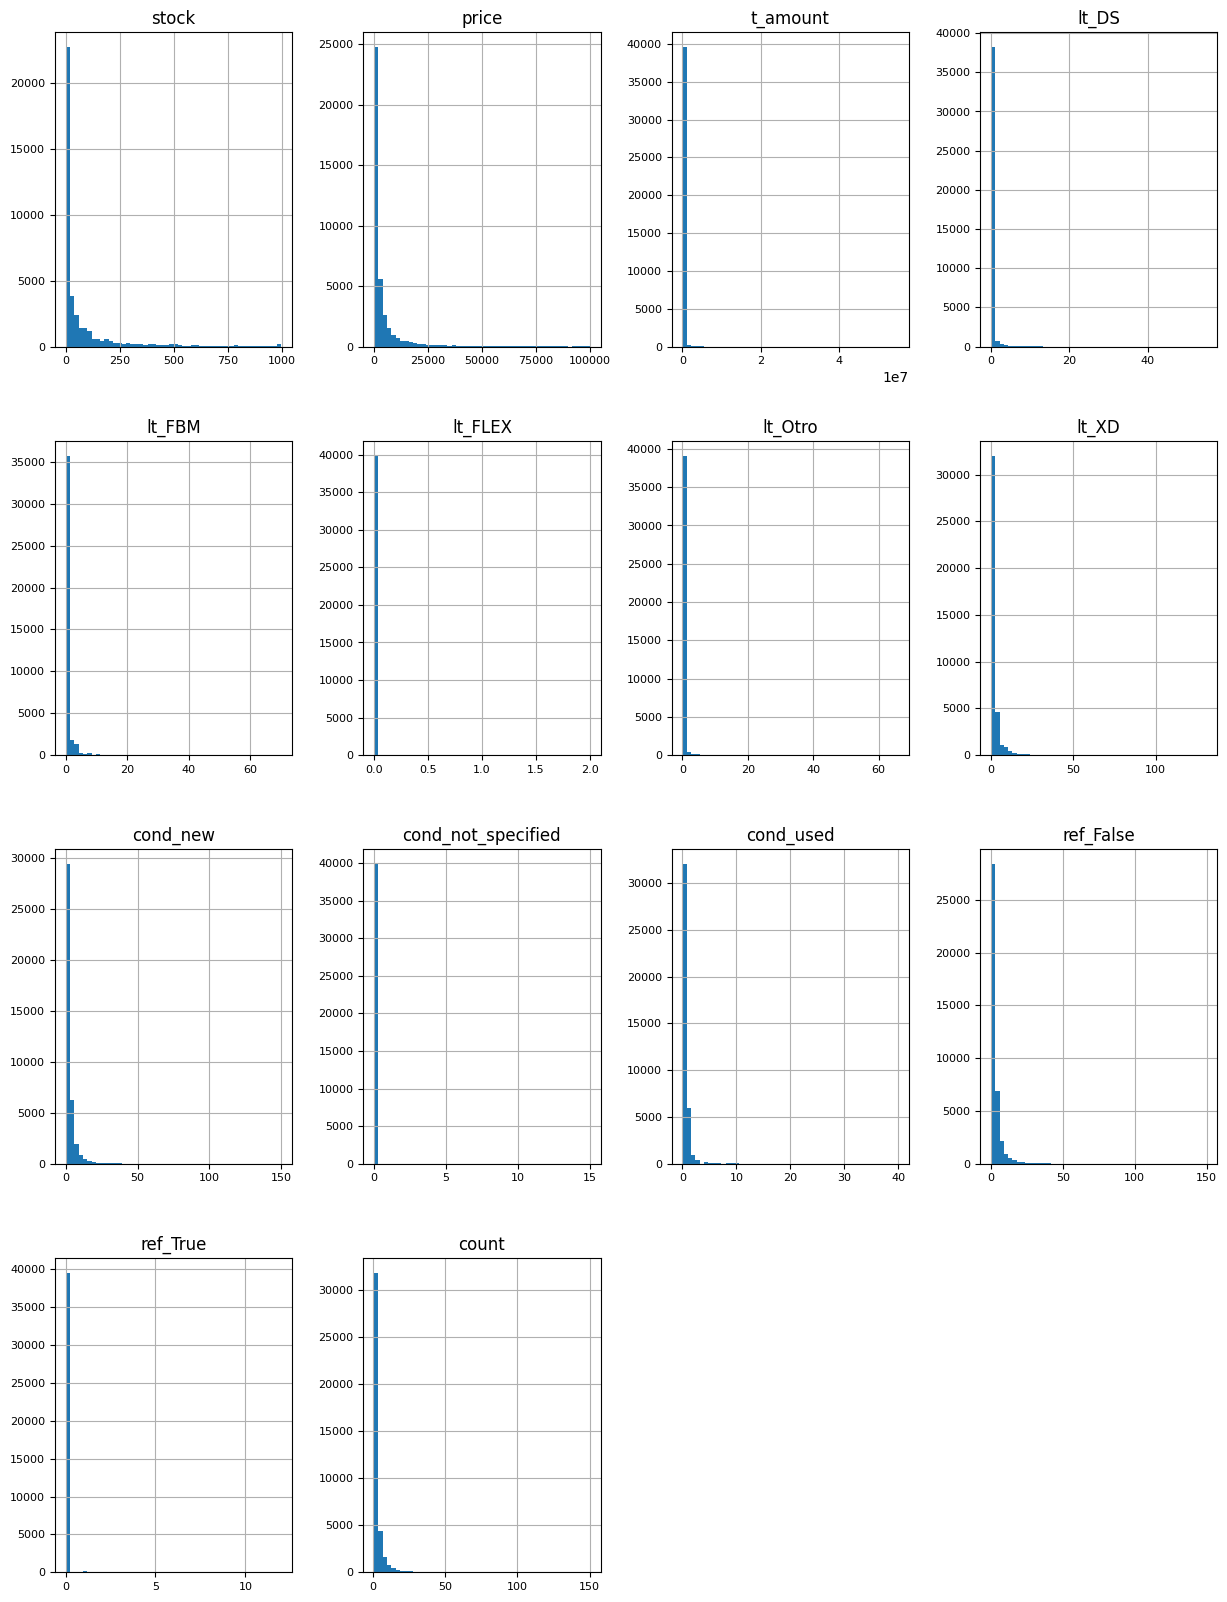

In [53]:
# Analisis de distribucion por cada varaibale

df_nsp.hist(figsize=(15,20), bins=50, xlabelsize=8,ylabelsize=8);

In [54]:
corr = round(df_nsp.corr(),3)
corr.style.background_gradient()

,stock,price,t_amount,lt_DS,lt_FBM,lt_FLEX,lt_Otro,lt_XD,cond_new,cond_not_specified,cond_used,ref_False,ref_True,count
stock,1.000000,0.051000,0.292000,0.124000,0.231000,-0.000000,0.046000,0.179000,0.311000,-0.007000,-0.107000,0.283000,-0.002000,0.283000
price,0.051000,1.000000,0.185000,0.104000,0.084000,0.015000,0.204000,0.391000,0.403000,0.013000,0.141000,0.434000,0.074000,0.438000
t_amount,0.292000,0.185000,1.000000,0.039000,0.026000,0.000000,0.046000,0.056000,0.086000,-0.002000,-0.031000,0.077000,0.010000,0.078000
lt_DS,0.124000,0.104000,0.039000,1.000000,-0.029000,-0.001000,0.001000,-0.092000,0.158000,-0.003000,0.021000,0.161000,0.030000,0.162000
lt_FBM,0.231000,0.084000,0.026000,-0.029000,1.000000,-0.002000,-0.018000,0.079000,0.461000,-0.005000,-0.074000,0.441000,-0.003000,0.441000
lt_FLEX,-0.000000,0.015000,0.000000,-0.001000,-0.002000,1.000000,-0.001000,0.019000,0.018000,-0.000000,-0.002000,0.017000,-0.000000,0.017000
lt_Otro,0.046000,0.204000,0.046000,0.001000,-0.018000,-0.001000,1.000000,0.016000,0.202000,0.010000,0.105000,0.228000,0.007000,0.228000
lt_XD,0.179000,0.391000,0.056000,-0.092000,0.079000,0.019000,0.016000,1.000000,0.826000,0.029000,0.162000,0.864000,0.031000,0.865000
cond_new,0.311000,0.403000,0.086000,0.158000,0.461000,0.018000,0.202000,0.826000,1.000000,-0.004000,-0.117000,0.966000,0.033000,0.967000
cond_not_specified,-0.007000,0.013000,-0.002000,-0.003000,-0.005000,-0.000000,0.010000,0.029000,-0.004000,1.000000,0.033000,0.024000,-0.001000,0.024000


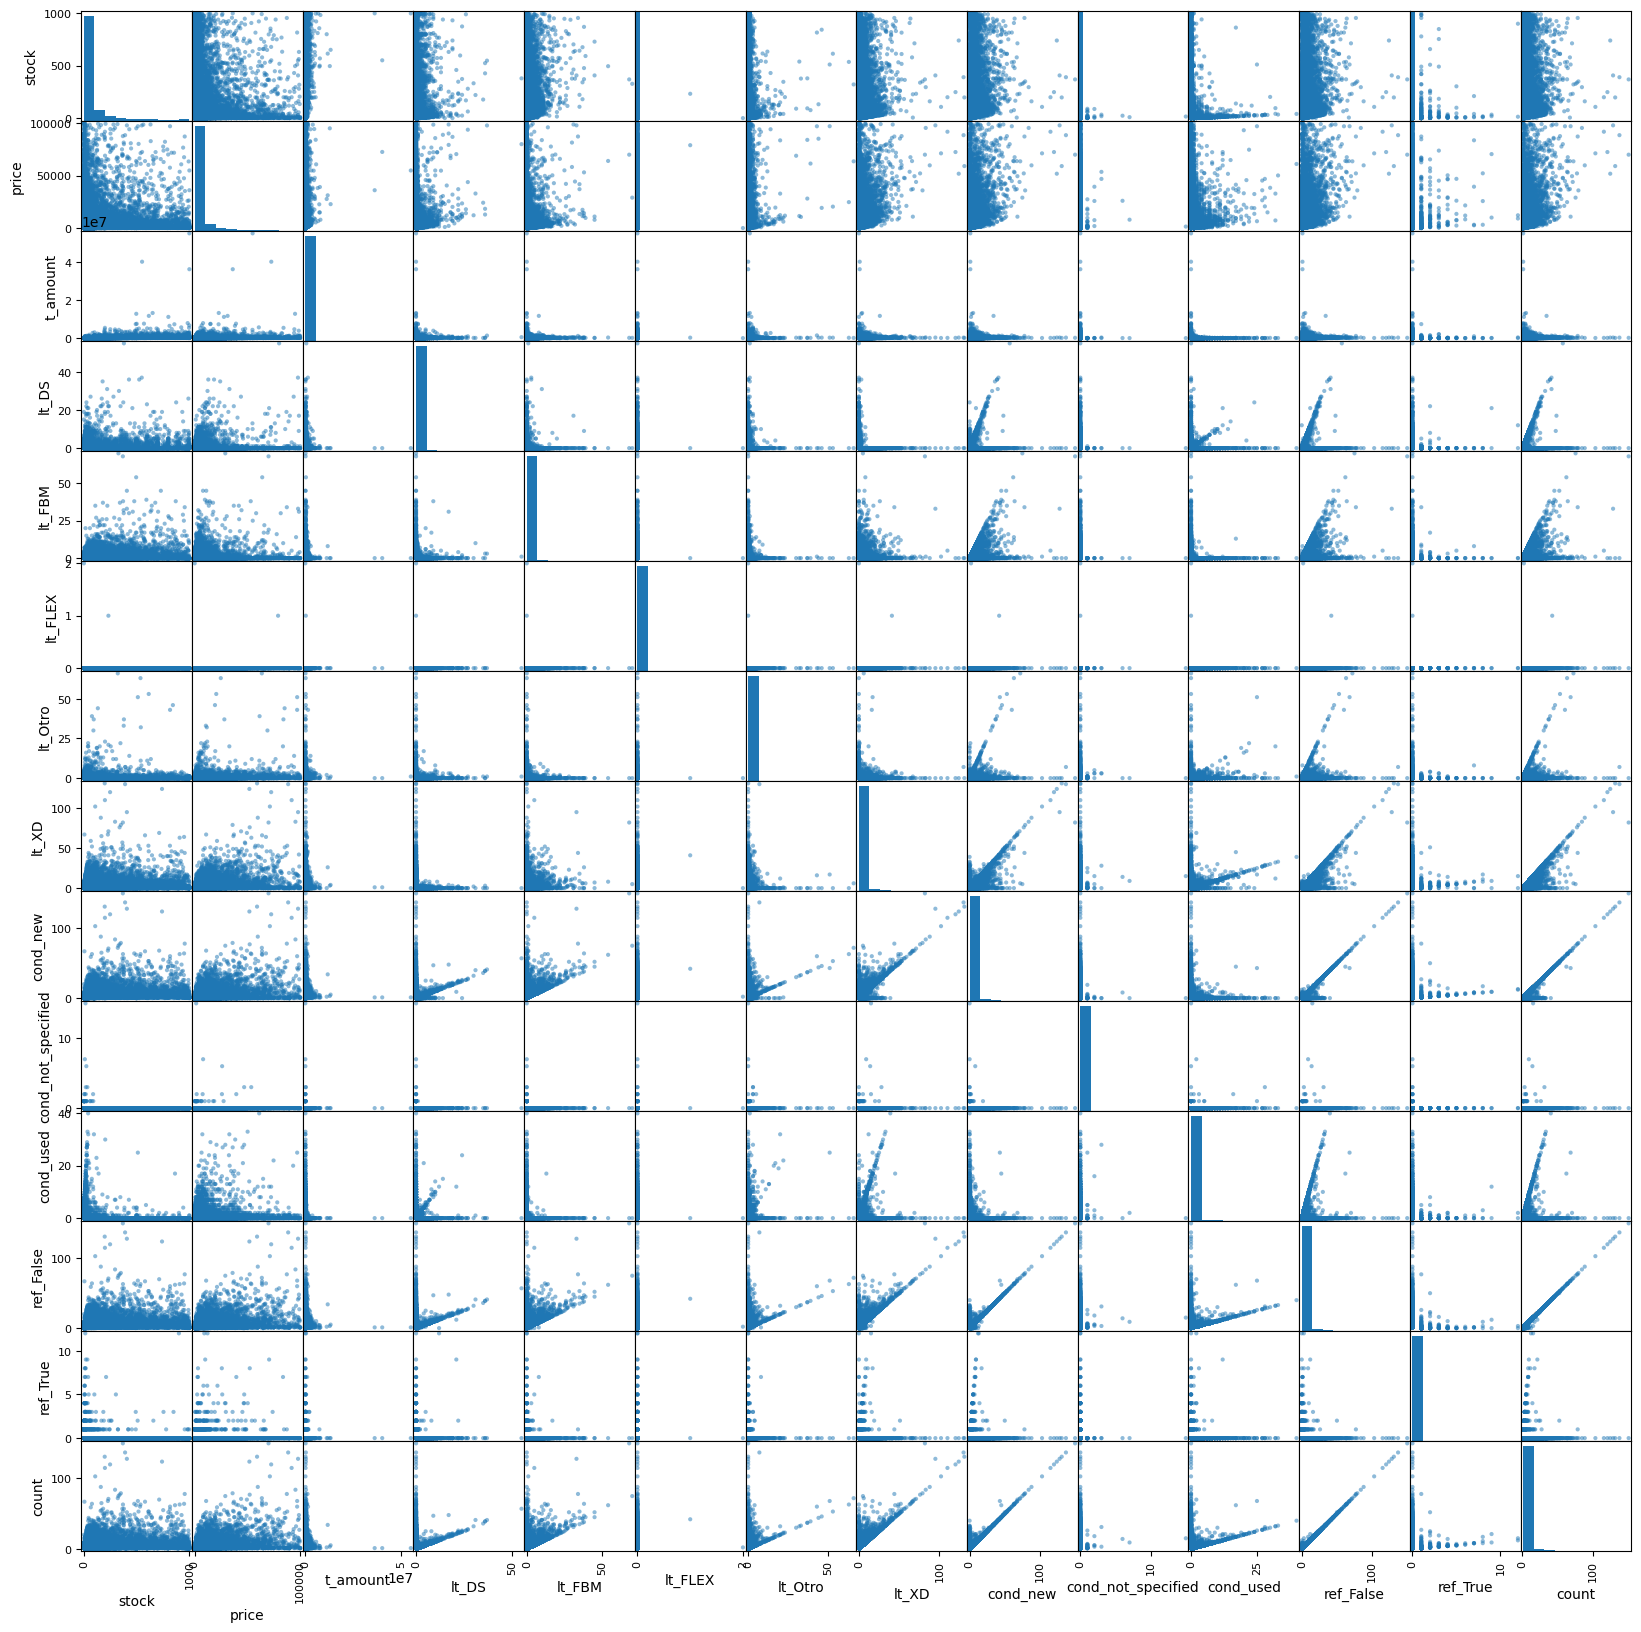

In [55]:
pd.plotting.scatter_matrix(df_nsp, figsize=(20, 20));

# PREPROCESAMIENTO DE DATOS

### En esta seccion, procesare la data para que se consumida en el modelado.
- ### Escalaremos con StandardScaler los datos
- ### Creare el subset para utilizar un PCA

In [56]:
from sklearn.preprocessing import  StandardScaler
df_PCA=df_nsp.copy()


In [57]:
x= StandardScaler().fit_transform(df_PCA)
x
df_PCA= pd.DataFrame(x,columns=df_PCA.columns)
df_PCA


,stock,price,t_amount,lt_DS,lt_FBM,lt_FLEX,lt_Otro,lt_XD,cond_new,cond_not_specified,cond_used,ref_False,ref_True,count
0,-0.424796,-0.374470,-0.132720,-0.210058,-0.285026,-0.006721,0.799215,-0.481728,-0.327727,-0.017475,-0.276720,-0.394713,-0.065452,-0.397429
1,-0.160834,-0.374570,-0.102950,-0.210058,-0.285026,-0.006721,-0.130814,-0.000809,-0.121646,-0.017475,-0.276720,-0.189130,-0.065452,-0.191957
2,-0.483454,-0.377879,-0.149765,-0.210058,-0.285026,-0.006721,-0.130814,-0.000809,-0.121646,-0.017475,-0.276720,-0.189130,-0.065452,-0.191957
3,-0.454125,-0.299166,-0.133232,-0.210058,-0.285026,-0.006721,-0.130814,-0.241268,-0.533809,-0.017475,0.531772,-0.394713,-0.065452,-0.397429
4,-0.448259,-0.362838,-0.143215,-0.210058,0.249720,-0.006721,-0.130814,-0.241268,-0.121646,-0.017475,-0.276720,-0.189130,-0.065452,-0.191957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39844,-0.477588,1.550844,-0.107100,-0.210058,-0.285026,-0.006721,0.799215,-0.481728,-0.327727,-0.017475,-0.276720,-0.394713,-0.065452,-0.397429
39845,-0.448259,-0.399538,-0.142738,-0.210058,-0.285026,-0.006721,-0.130814,-0.241268,-0.327727,-0.017475,-0.276720,-0.394713,-0.065452,-0.397429
39846,1.546114,0.106177,0.323080,-0.210058,0.784466,-0.006721,-0.130814,0.239651,0.496599,-0.017475,-0.276720,0.427618,-0.065452,0.424458
39847,-0.477588,1.550744,-0.107102,-0.210058,-0.285026,-0.006721,0.799215,-0.481728,-0.327727,-0.017475,-0.276720,-0.394713,-0.065452,-0.397429


In [58]:
df_PCA.describe().T

,count,mean,std,min,25%,50%,75%,max
stock,39849.0,-6.954043e-18,1.000013,-0.483454,-0.471722,-0.418930,-0.061116,5.376484
price,39849.0,-4.841084e-17,1.000013,-0.453634,-0.406757,-0.329348,-0.073755,9.572467
t_amount,39849.0,2.300184e-17,1.000013,-0.149765,-0.145259,-0.130791,-0.063965,117.059396
lt_DS,39849.0,1.729595e-17,1.000013,-0.210058,-0.210058,-0.210058,-0.210058,44.722804
lt_FBM,39849.0,1.462132e-17,1.000013,-0.285026,-0.285026,-0.285026,-0.285026,37.147208
lt_FLEX,39849.0,3.209558e-18,1.000013,-0.006721,-0.006721,-0.006721,-0.006721,178.544784
lt_Otro,39849.0,-1.542371e-17,1.000013,-0.130814,-0.130814,-0.130814,-0.130814,61.251125
lt_XD,39849.0,-1.141176e-17,1.000013,-0.481728,-0.481728,-0.241268,-0.000809,31.018509
cond_new,39849.0,-3.566176e-17,1.000013,-0.533809,-0.327727,-0.327727,0.084436,30.378442
cond_not_specified,39849.0,1.426470e-18,1.000013,-0.017475,-0.017475,-0.017475,-0.017475,155.885029


## PCA

### Es necesario realizar la varianza acumulativa explicada para saber cuantas componentes son necesarias

In [59]:
from sklearn.decomposition import PCA
import numpy as np

In [60]:
pca = PCA(n_components=None)
sklearn_transf = pca.fit_transform(df_PCA)
varianza_expl = pca.explained_variance_ratio_
varianza_expl

array([3.09316434e-01, 9.79398326e-02, 8.67075367e-02, 7.31376434e-02,
       7.16381335e-02, 7.11253180e-02, 7.09028163e-02, 6.71667806e-02,
       6.02727783e-02, 5.29747137e-02, 3.88180128e-02, 7.59958198e-17,
       0.00000000e+00, 0.00000000e+00])

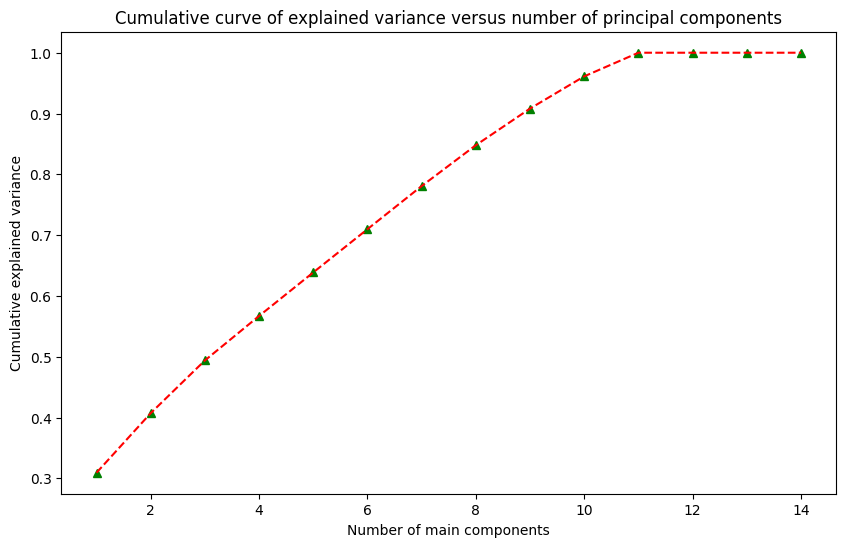

In [61]:
cum_var_exp = np.cumsum(varianza_expl)
plt.figure(figsize = (10, 6))
plt.xlabel('Number of main components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative curve of explained variance versus number of principal components')
nc = np.arange(1, varianza_expl.shape[0] + 1)
plt.plot(nc, cum_var_exp, 'g^')
plt.plot(nc, cum_var_exp, '--r')
plt.show()

### Por lo que observamos se necesitan 9 componentes, para tener un 90% de varianza

In [62]:
pca = PCA(n_components = 3)
pca.fit(df_PCA)
PCA_DF=pd.DataFrame(pca.transform(df_PCA), columns=['col0','col1', 'col2'])
PCA_DF.describe()

,col0,col1,col2
count,3.984900e+04,3.984900e+04,3.984900e+04
mean,-3.922794e-17,-2.995588e-17,-1.141176e-17
std,2.080995e+00,1.170979e+00,1.101788e+00
min,-1.038857e+00,-3.851453e+01,-1.928528e+01
25%,-9.126929e-01,-2.526598e-01,-3.461887e-01
50%,-6.366416e-01,6.789067e-02,-2.063647e-01
75%,5.377011e-02,4.003449e-01,1.392810e-01
max,6.038016e+01,2.398234e+01,7.278161e+01


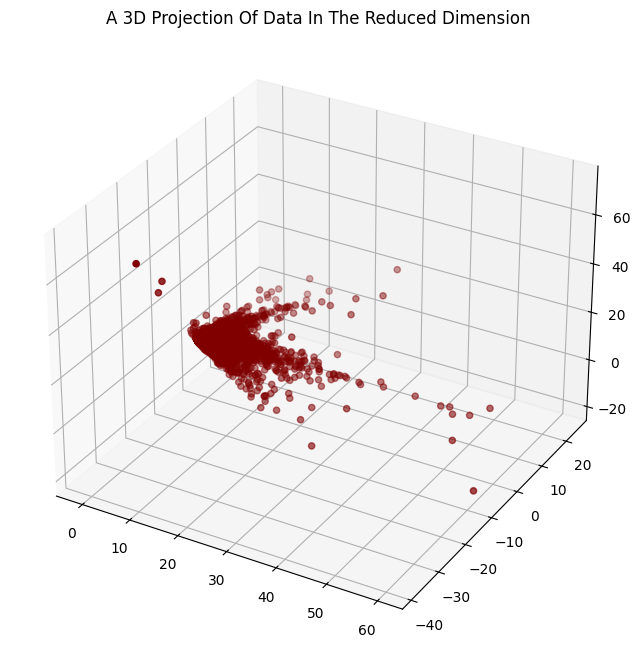

In [64]:
#Graficamos en 3d ya que elegimos 3 componentes
x =PCA_DF["col0"]
y =PCA_DF["col1"]
z =PCA_DF["col2"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

# MODELADO

### Se deb buscar un algoritmo de clusterizacion no supervisado, ya que no se documenta las eetiquetas en la informacion. para este caso usaremos los algoritmos de clusterizacion Kmean, Dbscan y aglomerativo.

In [66]:
from sklearn.cluster import KMeans,DBSCAN, AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer


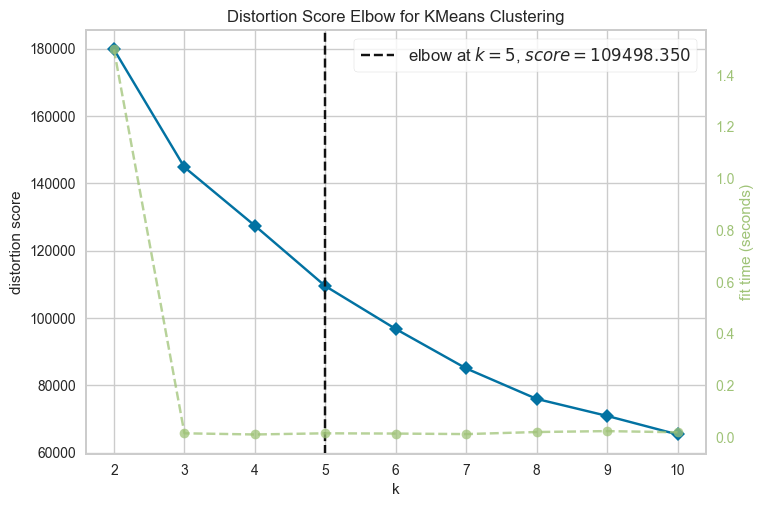

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [67]:
# Realizo la grafica del codo para saber cuantos cluster son necesarios

bow = KElbowVisualizer(KMeans(), k=10)
bow.fit(PCA_DF)
bow.show()

### Segun la grafica del codo se implementarias 5 clusters

## Kmeans

In [69]:
# inicializamos una instacia del Kmeans
cluster_Km= KMeans(n_clusters=5)
cluster_Km.fit_predict(PCA_DF)

klabels = cluster_Km.labels_



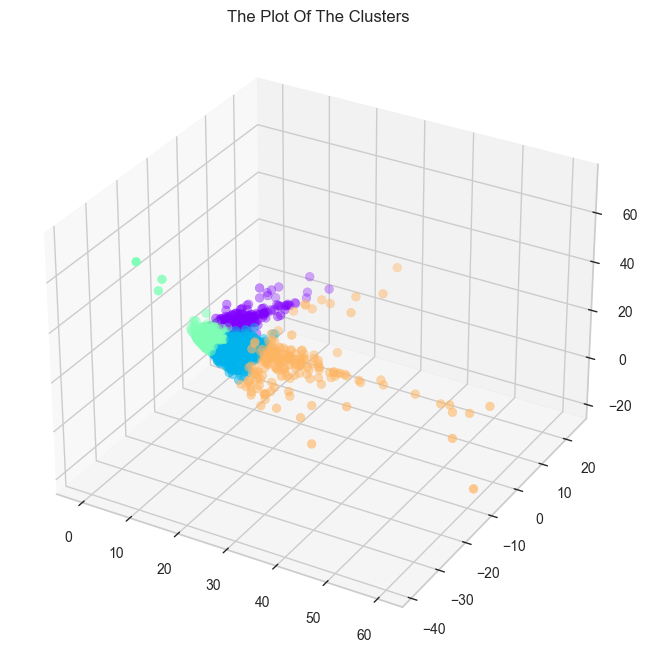

In [72]:


fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=klabels, marker='o', cmap = 'rainbow_r' )
ax.set_title("The Plot Of The Clusters")
plt.show()

# DBSCAN

In [73]:
db = DBSCAN(eps=0.9, min_samples=1)
db.fit(PCA_DF)
dblabels = db.labels_
dblabels

array([0, 0, 0, ..., 0, 0, 0], shape=(39849,))

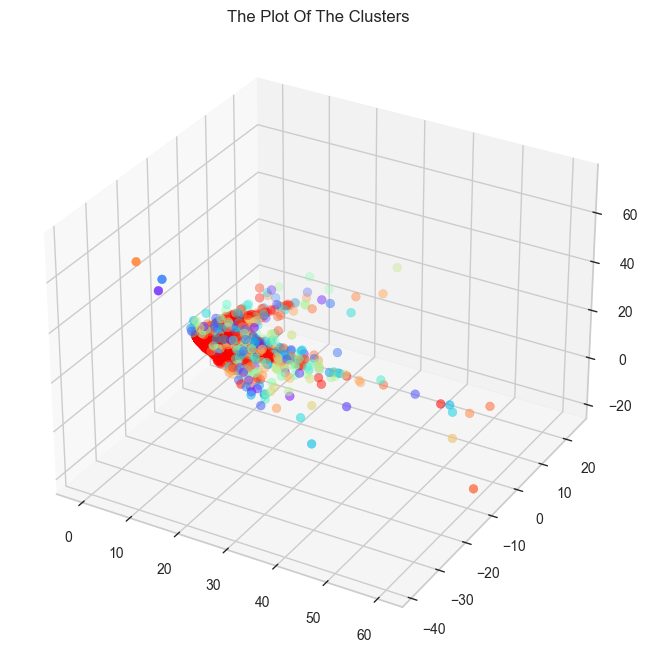

In [74]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=dblabels, marker='o', cmap = 'rainbow_r' )
ax.set_title("The Plot Of The Clusters")
plt.show()

# AGLOMERATIVO

In [ ]:
#Initiating the Agglomerative Clustering model 
AgC = AgglomerativeClustering(n_clusters=5)
# fit model and predict clusters
AgClabels = AgC.fit_predict(PCA_DF)
AgClabels

array([4, 4, 4, ..., 0, 0, 4], shape=(39849,))

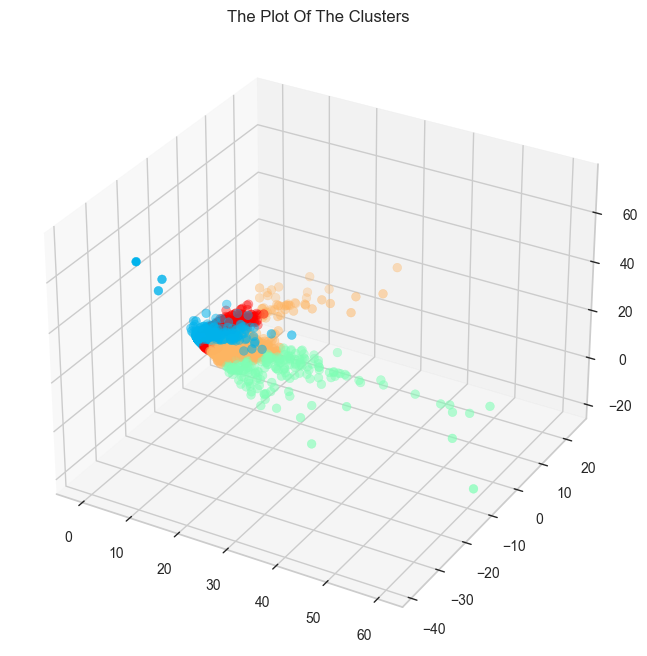

In [76]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=AgClabels, marker='o', cmap = 'rainbow_r' )
ax.set_title("The Plot Of The Clusters")
plt.show()

### Concluyendo podemos ver que los modelos que mejor comportamiento tuvieron fueron el Kmean y el aglomerativo.

In [77]:
#Agregamos las clasificacion de los models a la data original

dfv5['Kmeans'] = klabels
dfv5['AgC'] =  AgClabels

dfv5

,index,stock,price,t_amount,lt_DS,lt_FBM,lt_FLEX,lt_Otro,lt_XD,cond_new,cond_not_specified,cond_used,ref_False,ref_True,count,Kmeans,AgC
seller_nickname,,,,,,,,,,,,,,,,,
000631669c,117632,10,799.00,7990.0,0,0,0,1,0,1,0,0,1,0,1,0,4
0007153bca,243165,55,798.00,21945.0,0,0,0,0,2,2,0,0,2,0,2,0,4
000bee3c3b,108743,0,765.00,0.0,0,0,0,0,2,2,0,0,2,0,2,0,4
000df2bd02,174588,5,1550.00,7750.0,0,0,0,0,1,0,0,1,1,0,1,0,4
000e27cea2,173891,6,915.00,3070.0,0,1,0,0,1,2,0,0,2,0,2,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fff9f4c6a0,29283,1,20000.00,20000.0,0,0,0,1,0,1,0,0,1,0,1,0,0
fffac55ae4,170154,6,549.00,3294.0,0,0,0,0,1,1,0,0,1,0,1,0,4
fffbc92083,96695,346,5592.45,221655.0,0,2,0,0,3,5,0,0,5,0,5,2,0


In [78]:
dfv5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39849 entries, 000631669c to ffff407100
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               39849 non-null  int64  
 1   stock               39849 non-null  int64  
 2   price               39849 non-null  float64
 3   t_amount            39849 non-null  float64
 4   lt_DS               39849 non-null  int64  
 5   lt_FBM              39849 non-null  int64  
 6   lt_FLEX             39849 non-null  int64  
 7   lt_Otro             39849 non-null  int64  
 8   lt_XD               39849 non-null  int64  
 9   cond_new            39849 non-null  int64  
 10  cond_not_specified  39849 non-null  int64  
 11  cond_used           39849 non-null  int64  
 12  ref_False           39849 non-null  int64  
 13  ref_True            39849 non-null  int64  
 14  count               39849 non-null  int64  
 15  Kmeans              39849 non-null  int32  


(39849, 17)


Text(0.5, 1.0, 'AgC')

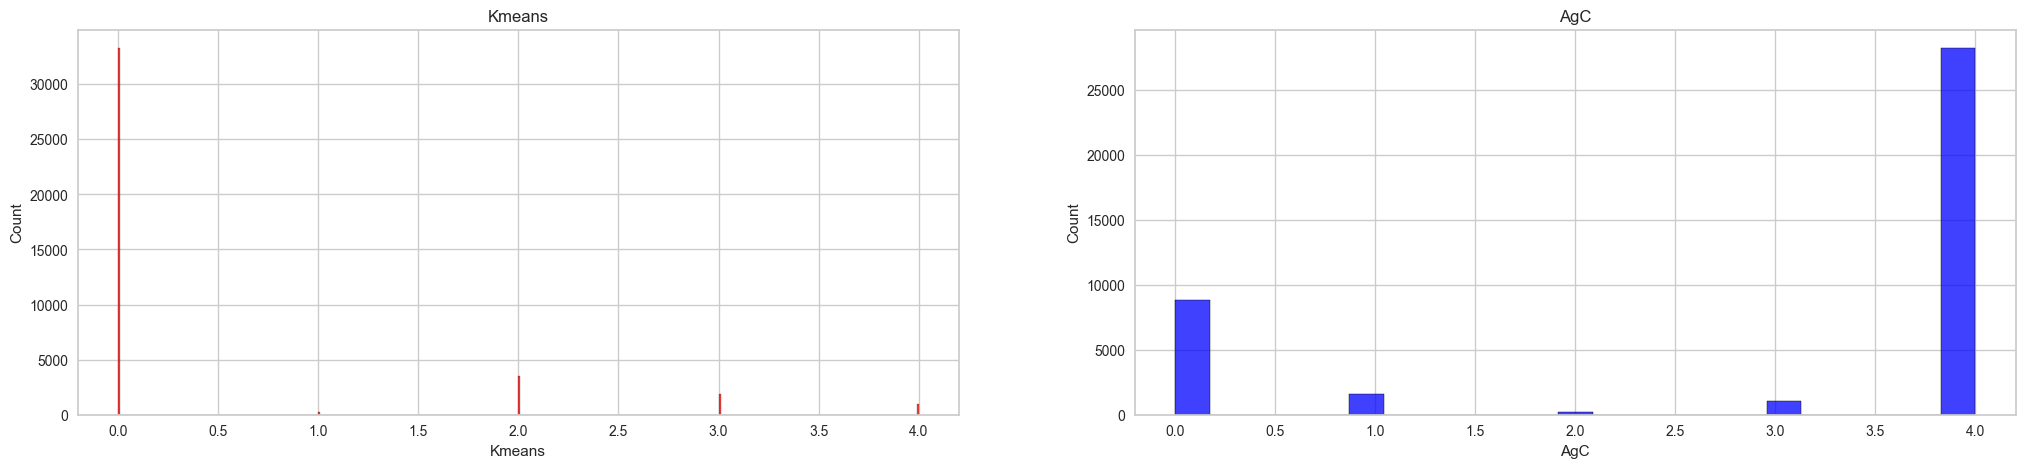

In [79]:
# la distribucion de  los grupos de Kmeans y Aglomerativo
print(dfv5.shape)
fig, ax =plt.subplots(ncols=2,figsize=(25,5),sharex=False)
sns.histplot(ax=ax[0], data = dfv5['Kmeans'],color='red')
ax[0].set_title('Kmeans')
sns.histplot(ax=ax[1], data = dfv5['AgC'],color='blue')
ax[1].set_title('AgC')

### Una vez terminado el modelado, viene el proceso de validacion y encontrar el patron que con el cual los algoritmos realizaron la clusterizacion, pues fue un proceso no supervisado. esto se hace de manera manual o apoyandose en matematicas y estadisticas. Se evaluan cada uno de los grupos.

### para finalizar se exporta la data con los clusters y el pkl de los algoritmos entrenados, para poder consumir en una api o utilizarlo.

In [80]:
import pickle

#exportamos el archivo con las predicciones de los modelos kemans (cluster_Km) y Aglomerativo(AgC).

#Exportar el archivo

dfv5.to_csv('D:/Clustering_MeLi/src/data/processed/resultado.csv')

#guardamos los Modelos
pickle.dump(cluster_Km,open('km.sav','wb'))
pickle.dump(AgC,open('AgC.sav','wb'))

